# Calculate 3d correlation function

In this example, we calculate the 3D correlation function for an example cosmology.

In [1]:
import numpy as np
import pyccl as ccl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

First, we define a set of cosmological parameters with two different power spectrum calculations.

In [2]:
# Nonlinear power spectrum with CLASS Halofit transfer function
cosmo = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96, 
                      transfer_function='boltzmann_class', matter_power_spectrum='halofit')

# Linear power spectrum with linear BBKS transfer funtion
cosmo_lin = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96, 
                          transfer_function='bbks', matter_power_spectrum='linear')

Next, we create an array of separations $r$, and calculate the 3D correlation function for a = 1.

In [3]:
a = 1.0 # Scale factor
n_r = 10000 # number of points in r
r = np.logspace(-3., 4., n_r) # distance
xi = ccl.correlation_3d(cosmo, a, r)
xi_lin = ccl.correlation_3d(cosmo_lin, a, r)

Now we plot the 3d correlation function obtained for nonlinear power spectrum (blue line) and linear power spectrum (red line). Since this plot has a log scale, negative values are plotted as dashed lines.

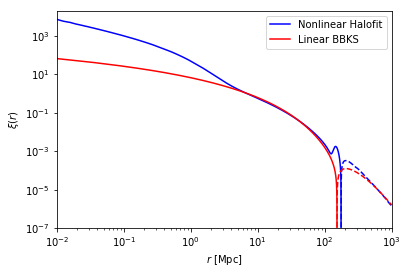

In [4]:
# Plot correlation function
plt.plot(r, xi, 'b-', label='Nonlinear Halofit')
plt.plot(r, xi_lin, 'r-', label='Linear BBKS')
plt.plot(r, -xi, 'b--') # Plot negative values as dashed lines
plt.plot(r, -xi_lin, 'r--')

plt.xscale('log')
plt.yscale('log')
plt.ylim((1e-7, 2e4))
plt.xlim((0.01, 1000))

plt.xlabel(r'$r$ $[\mathrm{Mpc}]$')
plt.ylabel(r'$\xi (r)$')
plt.legend()
plt.show()

Finally, we plot the 3d correlation function for large distances on a linear scale. Note the presence of the BAO feature at $r \approx 150$ Mpc in the nonlinear model; the linear BBKS model does not include this feature.

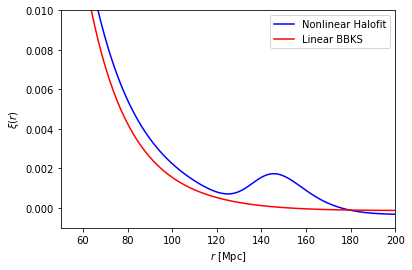

In [5]:
# Plot large r region on linear scale
plt.plot(r, xi, 'b-', label='Nonlinear Halofit')
plt.plot(r, xi_lin, 'r-', label='Linear BBKS')

plt.ylim((-0.001, 0.01))
plt.xlim((50, 200))

plt.xlabel(r'$r$ $[\mathrm{Mpc}]$')
plt.ylabel(r'$\xi(r)$')
plt.legend()
plt.show()